## Introductory Overview of PyMC

https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html

## A Motivating Example: Linear Regression



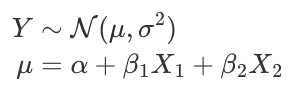


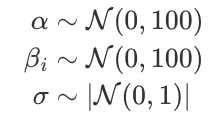

## Setting up PyMC3

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

## Generating data


In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

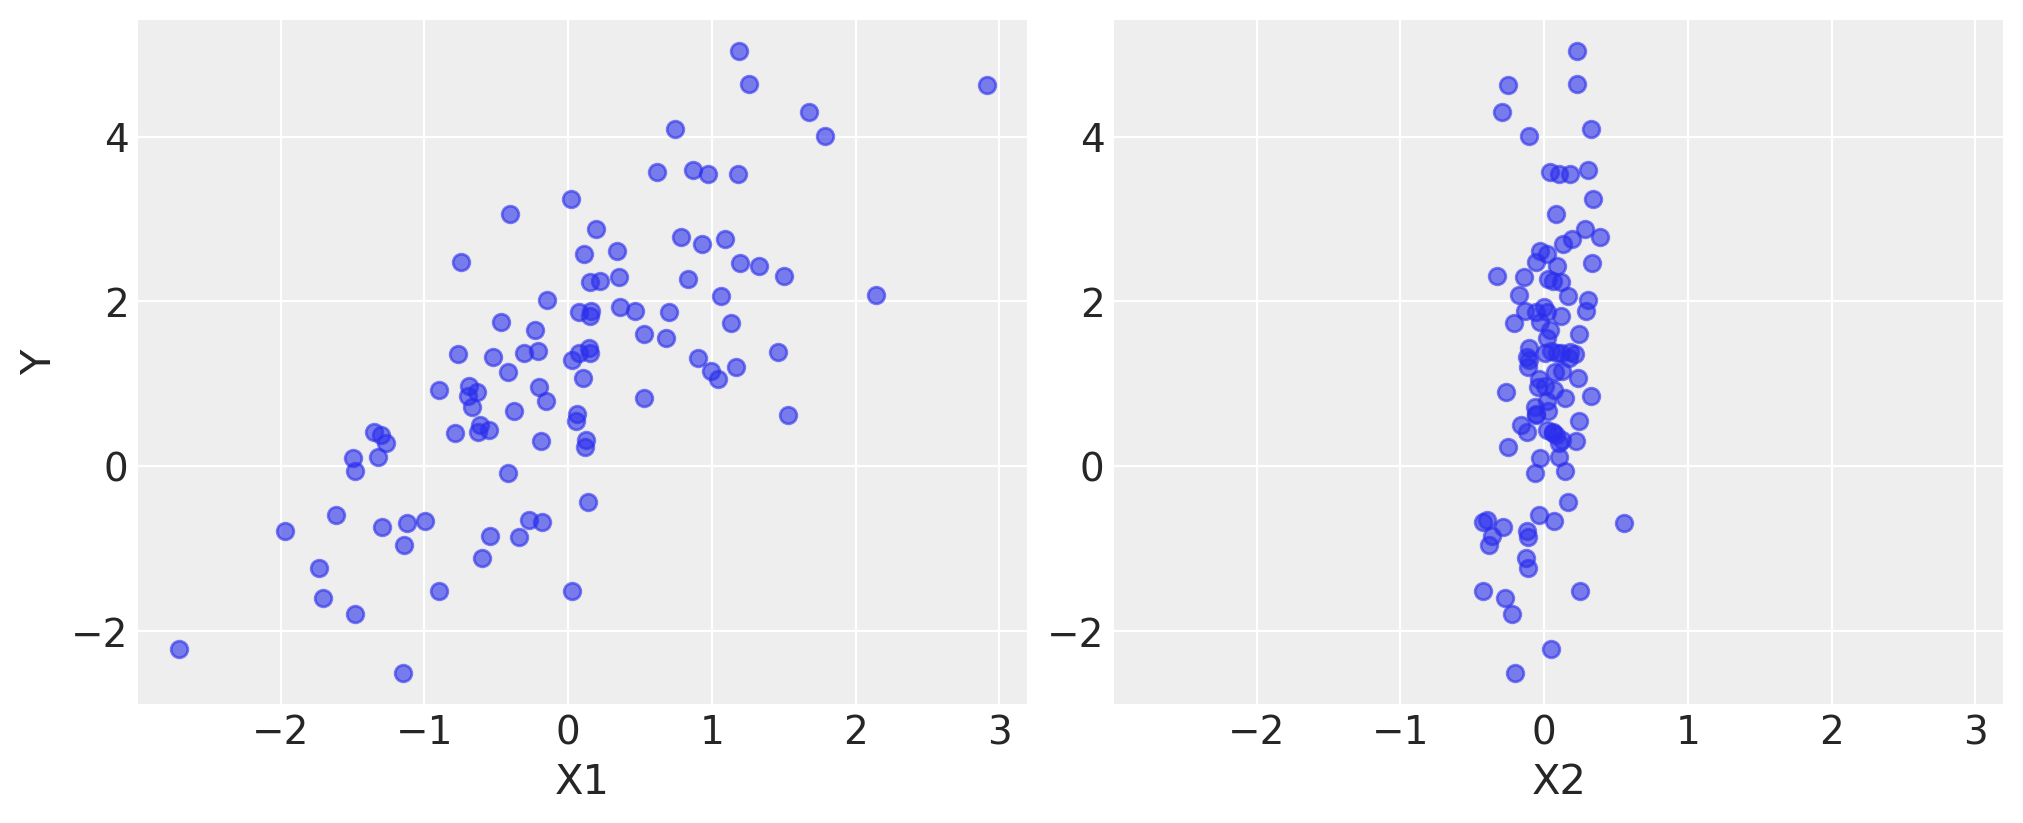

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

## Model Specification


In [5]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.0.1


In [6]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [7]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [8]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [9]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[1.2488847 , 1.18000007, 1.18926948, 1.14909552, 1.12352147],
       [1.1454017 , 1.16394384, 1.24502076, 1.15740906, 1.16210723],
       [1.12391089, 1.22239616, 1.22239616, 1.23111119, 1.0047976 ],
       [1.08642237, 1.21166956, 1.07615697, 1.18571244, 1.11303954]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4

In [10]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [alpha]
>Slice: [beta]
>Slice: [sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 9 seconds.


## Posterior analysis


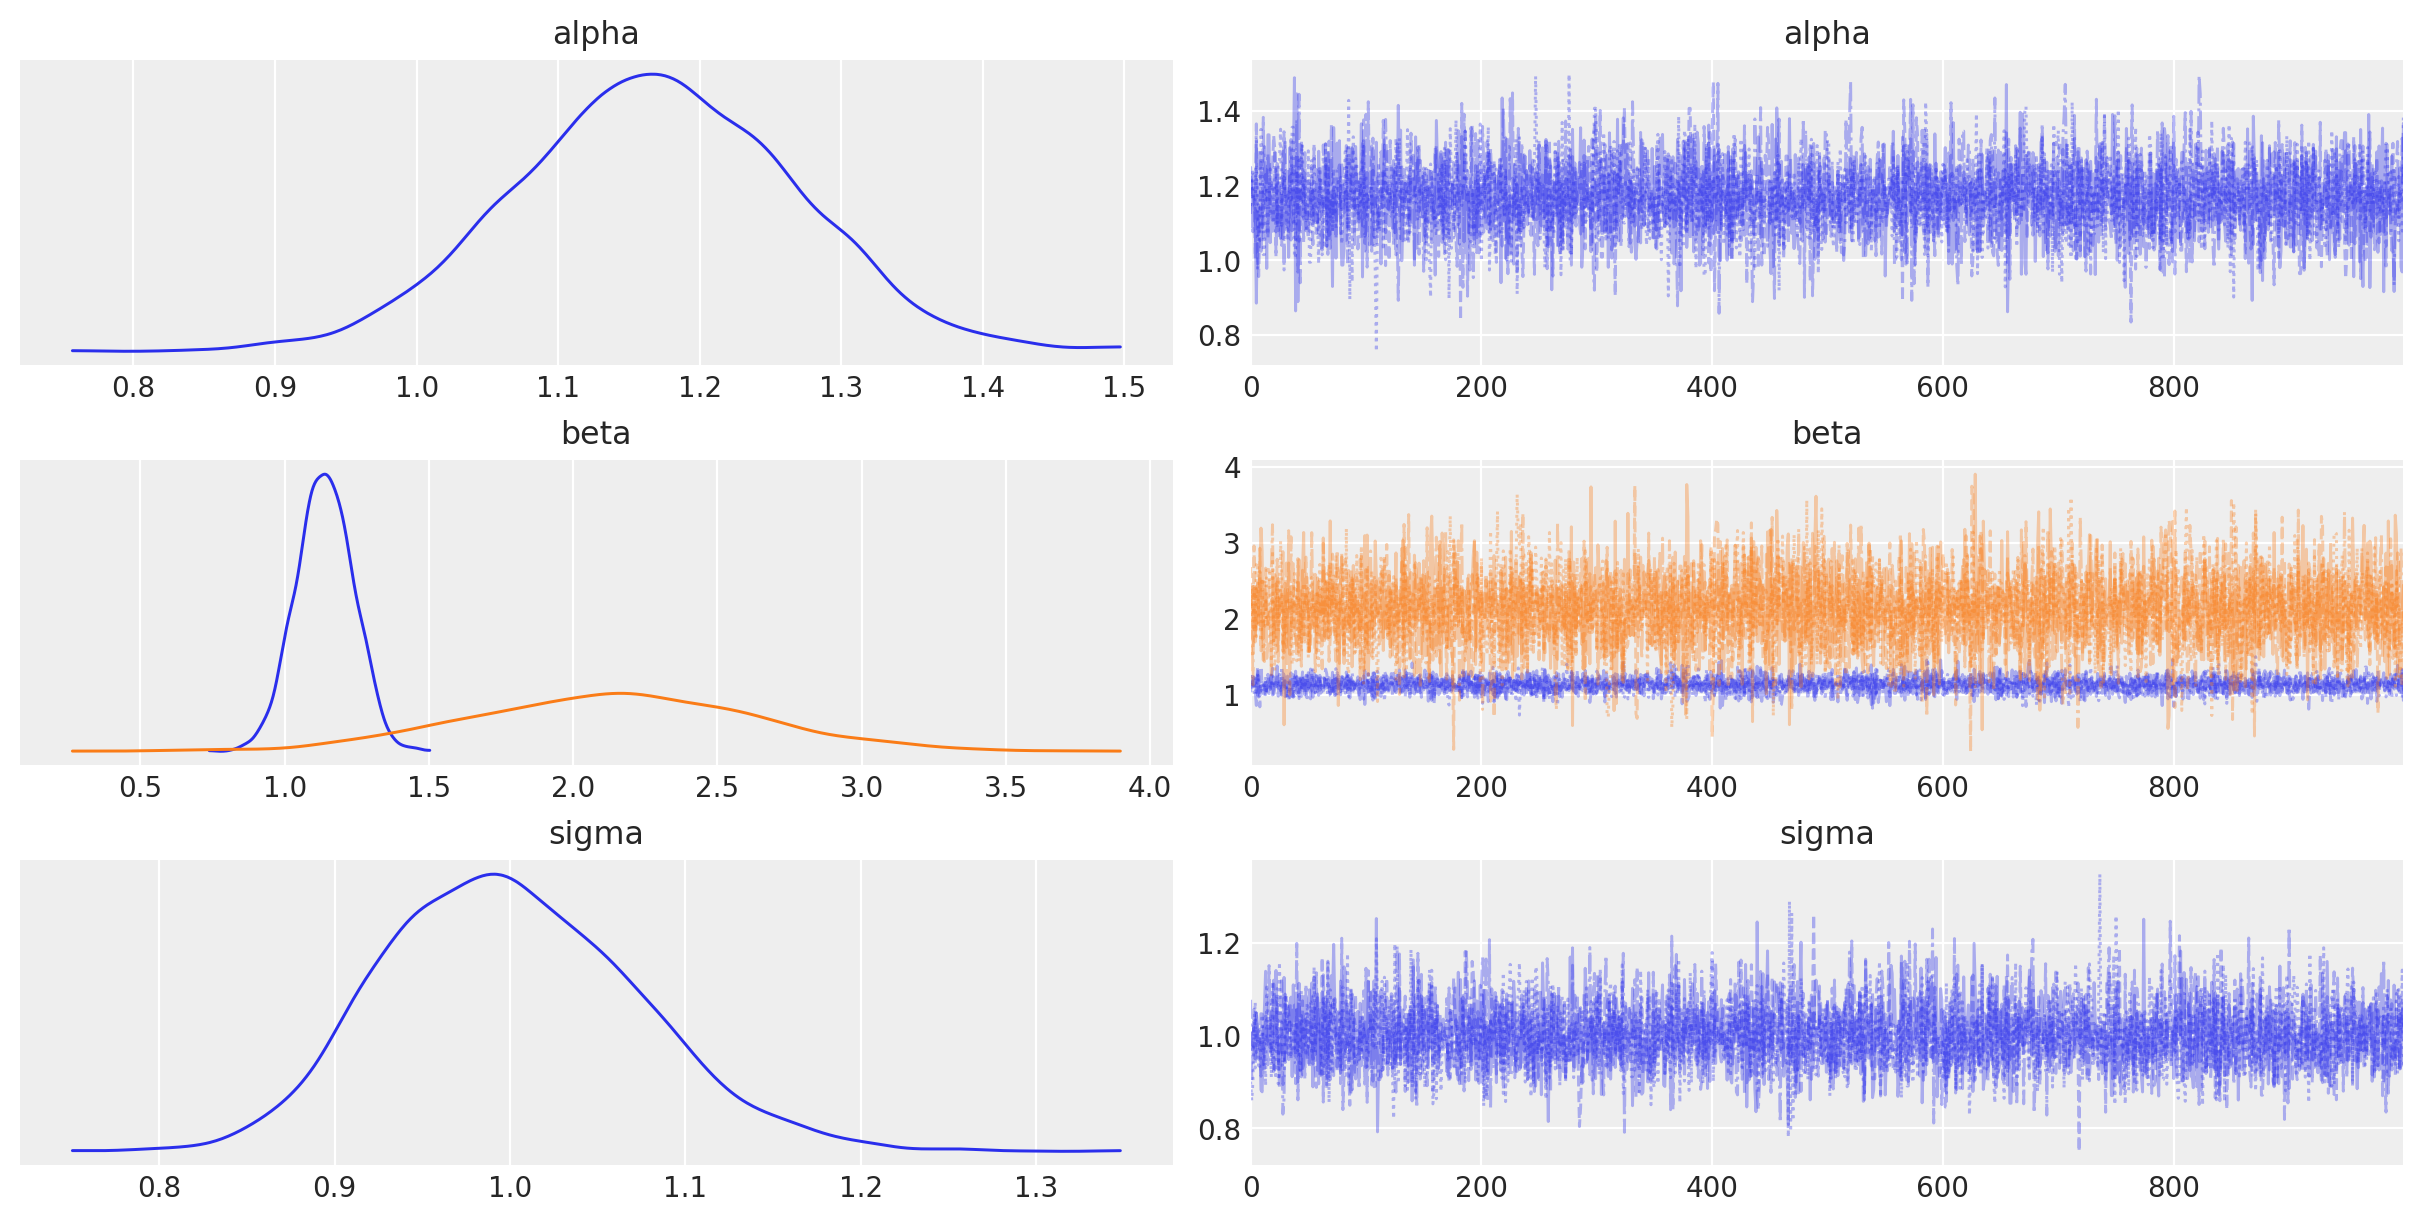

In [11]:
az.plot_trace(idata, combined=True);

In [12]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.17,0.10,0.99,1.35,0.00,0.0,5861.23,3208.27,1.0
beta[0],1.14,0.10,0.97,1.33,0.00,0.0,5454.20,3285.45,1.0
beta[1],2.14,0.50,1.20,3.07,0.01,0.0,5365.17,3249.95,1.0
sigma,1.00,0.07,0.87,1.14,0.00,0.0,5597.73,3275.08,1.0


In [13]:
Y_obs

Y_obs

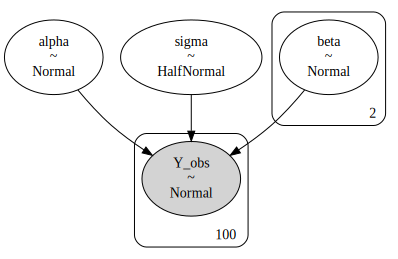

In [14]:
pm.model_to_graphviz(basic_model)

In [15]:
# testing github

# Logistic regression with PyMC3

In [16]:
import os
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
#import theano.tensor as tt
import warnings
from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, 
                             precision_recall_curve) 
from sklearn.metrics import confusion_matrix

In [17]:
os.getcwd()

'/home/yako/Desktop/TAMU_STAT/STAT685_Direct Studies/STAT685_GitProject'

In [18]:
df=pd.read_csv('/home/yako/Desktop/TAMU_STAT/STAT685_Direct Studies/STAT685_GitProject/datatest.txt')
df.sample(5)

FileNotFoundError: [Errno 2] No such file or directory: '/home/yako/Desktop/TAMU_STAT/STAT685_Direct Studies/STAT685_GitProject/datatest.txt'